In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from obspy import read, read_inventory, UTCDateTime
from statsmodels.robust.scale import mad
from datetime import timedelta, datetime
import matplotlib.dates as mdates
from scipy.signal import find_peaks
from obspy import read, Stream
from glob import glob
from scipy.signal import find_peaks
from statsmodels.robust.scale import mad
import os
import datetime

In [5]:
station = "C0909"
day = "20200310"
mpdir = "/home/gilbert_lab/cami_frs/scamp/X7_Jan-Feb2020/"
mpfile = "X7.{0}.DPZ.{1}_filt3-25_win100.mp".format(station,day)
datfile = "X7.{0}.DPZ.{1}_filt3-25.dat".format(station,day)
mp = pd.read_csv(os.path.join(mpdir,station,mpfile), delimiter=" ",header=None, usecols=[0], names=['mpall'])
dataz = pd.read_csv(os.path.join(mpdir,station, datfile),header=None,names=["data"])["data"].values

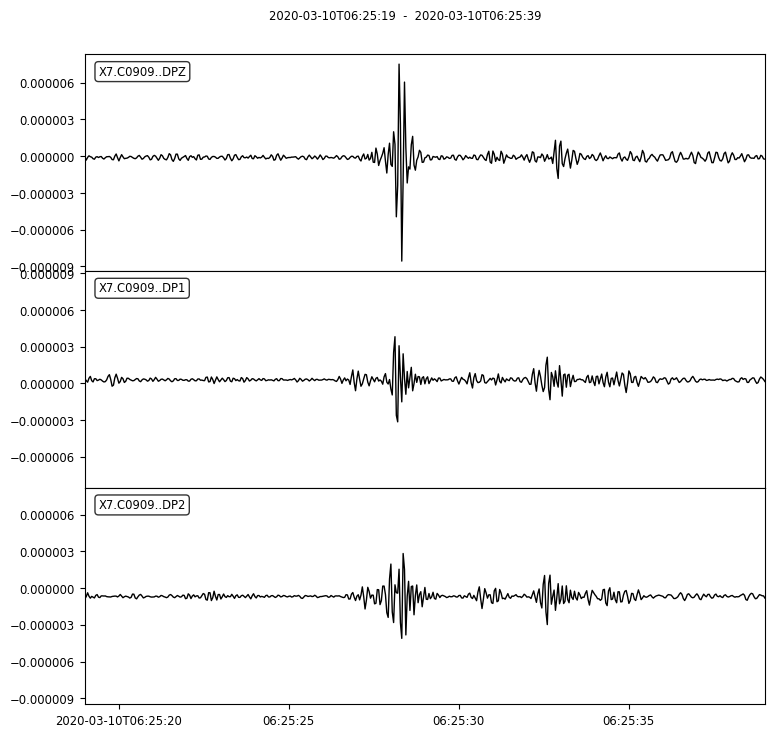

In [240]:
wfdir = "/home/gilbert_lab/cami_frs/hawk_data/sac_data_raw/Jan-Feb2020_sac_daily_250Hz/{0}/".format(station)
st = read(os.path.join(wfdir,"*{0}*{1}*.SAC".format(station,day)))

# process & plot
st.detrend("demean")
st.detrend("linear")
st.decimate(factor=10)
#st.filter("highpass",freq=3)
st.filter("lowpass",freq=10)
#st.filter("bandpass",freqmin=3,freqmax=10)
t1 = UTCDateTime(2020,3,10,6,19,49) + 330
t2 = t1 + 20
st.plot(starttime=t1,endtime=t2)

# Get times
tfull = st[0].times("matplotlib")
tmp = tfull[0:mp.shape[0]]
tdat = tfull[0:data.shape[0]]

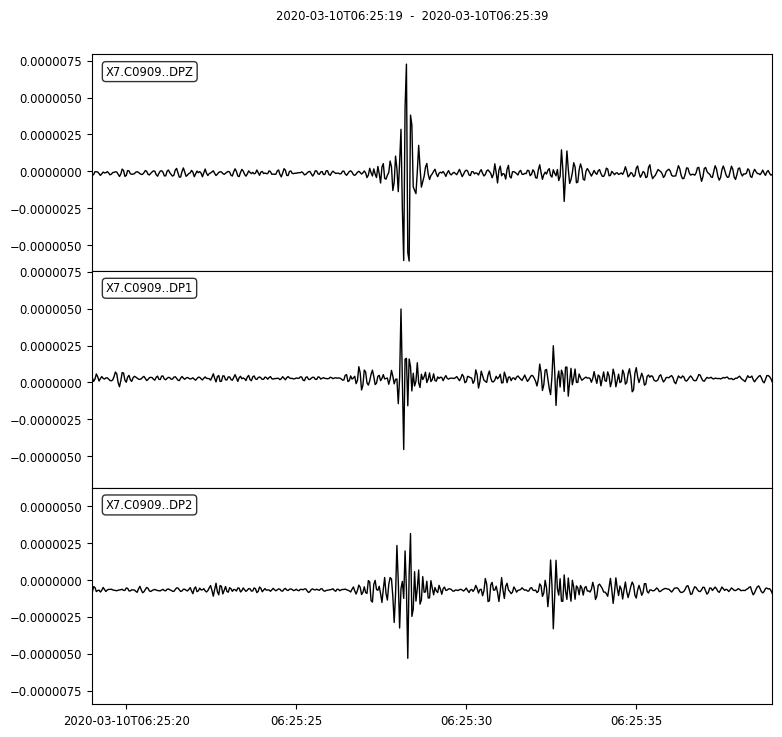

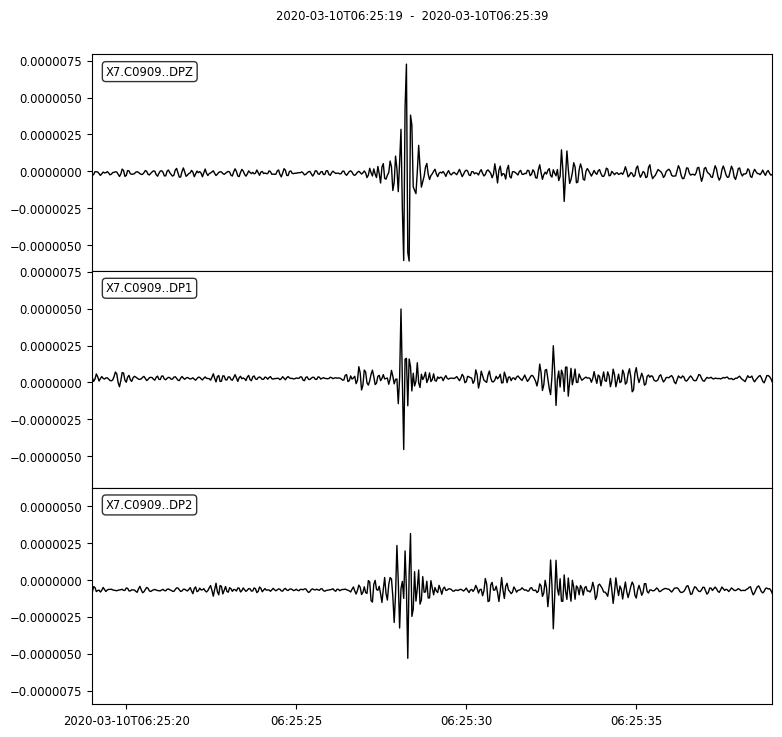

In [241]:
wfdir = "/home/gilbert_lab/cami_frs/hawk_data/sac_data_raw/Jan-Feb2020_sac_daily_250Hz/{0}/".format(station)
st = read(os.path.join(wfdir,"*{0}*{1}*.SAC".format(station,day)))

# process & plot
st.detrend("demean")
st.detrend("linear")
st.decimate(factor=10)
#st.filter("highpass",freq=3)
#st.filter("lowpass",freq=10)
#st.filter("bandpass",freqmin=3,freqmax=10)
t1 = UTCDateTime(2020,3,10,6,19,49) + 330
t2 = t1 + 20
st.plot(starttime=t1,endtime=t2)

In [3]:
mpdir = "/home/gilbert_lab/cami_frs/scamp/X7_Jan-Feb2020/"
flist = glob(os.path.join(mpdir,"*/X7.*20200310*win200.mp"))
mpstack = pd.read_csv(flist[0], delimiter=" ",header=None, usecols=[0], names=['mpall'])['mpall'].values
for file in flist[1:]:
    #print(file)
    dum = pd.read_csv(file, delimiter=" ",header=None, usecols=[0], names=['mpall'])['mpall'].values
    mpstack += dum
mpstack = mpstack/len(flist)
mpstack[:10]

array([ 0.76130329,  0.76208125,  0.74265028,  0.63712965,  0.55382912,
        0.54487603,  0.52372865,  0.50132424,  0.50489121,  0.49383079])

In [2]:
mpdir = "/home/gilbert_lab/cami_frs/scamp/X7_Jan-Feb2020/"
flist2 = glob(os.path.join(mpdir,"C0909/X7.*20200310*win200.mp"))
mpstack2 = pd.read_csv(flist2[0], delimiter=" ",header=None, usecols=[0], names=['mpall'])['mpall'].values
for file in flist2[1:]:
    #print(file)
    dum = pd.read_csv(file, delimiter=" ",header=None, usecols=[0], names=['mpall'])['mpall'].values
    mpstack2 += dum
mpstack2 = mpstack2/len(flist2)
mpstack2[:10]

array([ 0.69698259,  0.7114452 ,  0.70476196,  0.65119663,  0.63714447,
        0.63342474,  0.62732106,  0.62202499,  0.63068185,  0.63046716])

In [6]:
# base = datetime.datetime(2020,3,10,0,0,0)
# t = [base + datetime.timedelta(microseconds=40000*x) for x in range(25*3600*24+1)]
# t = mdates.date2num(t)
t = pd.read_csv(os.path.join(mpdir,"C0704/X7.C0704.DPZ.20200310_deci5.time"),header=None, usecols=[0], names=['t'])['t'].values
tmp = t[0:mpstack.shape[0]]
tdat = t[0:dataz.shape[0]]

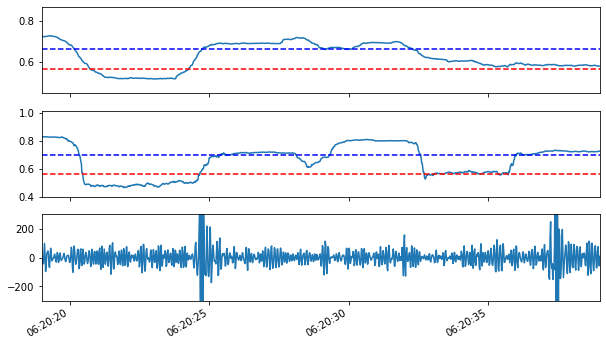

In [11]:
t1 = UTCDateTime(2020,3,10,6,19,49) + 30
t2 = t1 + 20

plt.rcParams['figure.figsize'] = [10,6]
fig, axs = plt.subplots(3,1)
#axs[0].plot_date(tmp,mp['mpall'].values,xdate=True,Marker=None,linestyle='-')
axs[0].plot_date(tmp,mpstack,xdate=True,Marker=None,linestyle='-')
axs[0].axhline(np.mean(mpstack),color='red',linestyle='--')
axs[0].axhline(np.mean(mpstack)+3*mad(mpstack),color='blue',linestyle='--')
axs[1].plot_date(tmp,mpstack2,xdate=True,Marker=None,linestyle='-')
axs[1].axhline(np.mean(mpstack2),color='red',linestyle='--')
axs[1].axhline(np.mean(mpstack2)+3*mad(mpstack2),color='blue',linestyle='--')
axs[2].plot_date(tdat,dataz,xdate=True,Marker=None,linestyle='-')

axs[2].set_ylim(-300,300)
axs[0].set_xlim([t1._get_datetime(), t2._get_datetime()])
axs[1].set_xlim([t1._get_datetime(), t2._get_datetime()])
axs[2].set_xlim([t1._get_datetime(), t2._get_datetime()])
fig.autofmt_xdate()

In [74]:
# Detect events


356.6009683037505

In [12]:
# stations=list(pd.read_csv(os.path.join(mpdir,"stations.list"),header=None,names=["stations"])["stations"].values)
# for sta in stations:
#     print(sta)
#     wd = "/home/gilbert_lab/cami_frs/hawk_data/sac_data_corrected/Jan-Feb2020_sac_daily_250Hz/{0}/".format(sta)
#     zlist = glob(os.path.join(wd,"*DPZ*"))
#     for fz in zlist:
#         print(fz)
#         fname = os.path.split(fz)[1]
#         parts = fname.split(".")[0:6]
#         tfile = os.path.join(mpdir,"{0}.{1}.{2}.{3}_filt3-25.time".format(parts[0],parts[1],parts[3],parts[5]))
#         st = read(fz)
#         st.decimate(factor=10)
#         time = st[0].times("matplotlib")
#         np.savetxt(tfile, time, fmt="%14.8f")
#         print(tfile)

In [13]:
# import matplotlib.dates as mdate
# (mdate.num2date(737477.00000046)-mdate.num2date(737477.00000000))

10.100000


In [14]:
# from glob import glob
# import os
# from obspy import read
# import numpy as np
# import sys

# sta = sys.argv[1]
# print(sta)

# wd = "/home/gilbert_lab/cami_frs/hawk_data/sac_data_corrected/Jan-Feb2020_sac_daily_250Hz/{0}/".format(sta)

# zlist = glob(os.path.join(wd,"*DPZ*"))
# for fz in zlist:
#     print(fz)
#     fname = os.path.split(fz)[1]
#     parts = fname.split(".")[0:6]
#     tfile = os.path.join(mpdir,"{0}.{1}.{2}.{3}_filt3-25.time".format(parts[0],parts[1],parts[3],parts[5]))
#     st = read(fz)
#     st.decimate(factor=10)
#     time = st[0].times("matplotlib")
#     np.savetxt(tfile, time, fmt="%14.8f")
#     print(tfile)